# Classification. Linear models and KNN

### Part 1
### My score 2,5 / 7

In [7]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import plot_confusion_matrix, accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder

## Part 1: Titanic survival prediction

### Dataset

Read the description here: https://www.kaggle.com/c/titanic/data. Download the dataset and place it in the *data/titanic/* folder in your working directory.
You will use train.csv for model training and validation. The test set is used for model testing: once the model is trained, you can predict whether a passenger survived or not for each passenger in the test set, and submit the predictions: https://www.kaggle.com/c/titanic/overview/evaluation.  


In [9]:
PATH = "./data/"

In [40]:
data = pd.read_csv(os.path.join(PATH, 'titanic', 'train.csv')).set_index('PassengerId')

In [13]:
data.head(100)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S
97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C


### EDA

**(0.5 points)** How many females and males are there in the dataset? What about the survived passengers? Is there any relationship between the gender and the survival?

In [28]:
## your code
male_total = data[(data.Sex=='male')].shape[0]
female_total = data[(data.Sex=='female') ].shape[0]

male_surv = data[(data.Sex=='male') &  (data.Survived==1)].shape[0]
female_surv = data[(data.Sex=='female') &  (data.Survived==1)].shape[0]

print("Male count:",  male_total)
print("Female count:",  female_total)

print("Male survive percent:",  int ((male_surv/male_total)*100), "%" )
print("Female survive percent:",  int ((female_surv/female_total)*100), "%" )





Male count: 577
Female count: 314
Male survive percent: 18 %
Female survive percent: 74 %


My thoughts:
В первую очередь женщины и денти, скорее всего этот факт повлиял на то что большая часть пассажиров женского пола спасласть. 


**(0.5 points)** Plot age distribution of the passengers. What is the average and the median age of survived and deceased passengers? Do age distributions differ for survived and deceased passengers? Why?

Total number of passasngers in dataset 891
Total number of passasngers in dataset after .dropna 714
average age: 29.69911764705882
median age: 28.0


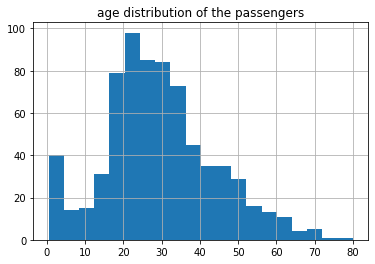

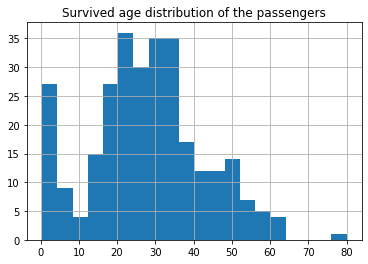

Survived average age: 28.343689655172415
Survived median age: 28.0


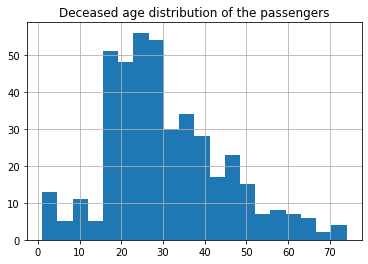

Deceased average age: 30.62617924528302
Deceased median age: 28.0


In [68]:
## your code


print(f"Total number of passasngers in dataset {data.shape[0]}")
data_with_age = data.dropna(subset=['Age'])

print(f"Total number of passasngers in dataset after .dropna {data_with_age.shape[0]}")

#data_to_draw = data[(data.Survived==0)]
print("average age:",  data_with_age.Age.mean())
print("median age:",  data_with_age.Age.median())

data_with_age.hist(column='Age', bins=20)
plt.title('age distribution of the passengers')
plt.show()


surv_with_age = data_with_age[(data_with_age.Survived==1)]
deceased_with_age = data_with_age[(data_with_age.Survived==0)]


surv_with_age.hist(column='Age', bins=20)
plt.title('Survived age distribution of the passengers')
plt.show()

print("Survived average age:",  surv_with_age.Age.mean())
print("Survived median age:",  surv_with_age.Age.median())


deceased_with_age.hist(column='Age', bins=20)
plt.title('Deceased age distribution of the passengers')
plt.show()

print("Deceased average age:",  deceased_with_age.Age.mean())
print("Deceased median age:",  deceased_with_age.Age.median())



< your thoughts >
По тому же правилу(вперед женщины и денти) большая часть детей спаслась, а вот старики после 65 почти не выживали. Это сместило средних выжевших, но детей и стариков на борту было не так много, поэтому средний возраст выжевших уменьшился всего на 1.5-2 года.

**(1 point)** Explore "passenger class" and "embarked" features. What class was "the safest"? Is there any relationship between the embarkation port and the survival? Provide the corresponding visualizations.

Total number of passasngers in dataset 891
Total number of passasngers in dataset after Embarked.dropna 889
Total number of passasngers in dataset after Pclass.dropna 891
Almost all cols have 'Embarked' and 'Pclass' values, so we use just 'data' how it is:

Survived percent related to Pclass:
Pclass
1    62.962963
2    47.282609
3    24.236253
dtype: float64


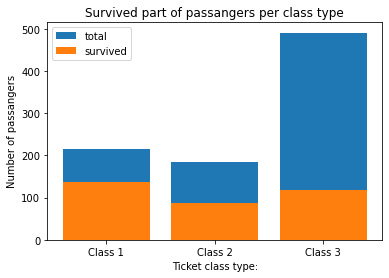


Survived percent related to  prot Embarked:
Embarked
C    55.357143
Q    38.961039
S    33.695652
dtype: float64


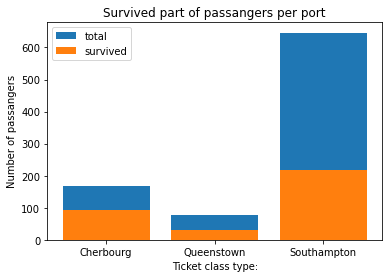

In [110]:
## your code

print(f"Total number of passasngers in dataset {data.shape[0]}")
data_with_Embarked = data.dropna(subset=['Embarked'])
print(f"Total number of passasngers in dataset after Embarked.dropna {data_with_Embarked.shape[0]}")

data_with_Pclass = data.dropna(subset=['Pclass'])
print(f"Total number of passasngers in dataset after Pclass.dropna {data_with_Pclass.shape[0]}")
print("Almost all cols have 'Embarked' and 'Pclass' values, so we use just 'data' how it is:")


#print(data.groupby('Pclass').count().max(axis=1))
print("\nSurvived percent related to Pclass:")
print(data[(data.Survived==1)].groupby('Pclass').count().max(axis=1).values/\
     data.groupby('Pclass').count().max(axis=1)*100 )

data['Pclass_name'] = data.apply(lambda x: 'Class 1' if x['Pclass'] == 1 else 'Class 2' if x['Pclass'] == 2 else 'Class 3', axis=1)
distr = data.groupby('Pclass_name').count().max(axis=1)

distr_surv = data[(data.Survived==1)].groupby('Pclass_name').count().max(axis=1)


plt.bar(distr.index, distr.values)
plt.bar(distr.index, distr_surv.values)
plt.legend(['total', 'survived'])
plt.ylabel('Number of passangers')
plt.xlabel('Ticket class type:')
plt.title('Survived part of passangers per class type')
plt.show()


#print(data.groupby('Embarked').count().max(axis=1))
print("\nSurvived percent related to  prot Embarked:")
print(data[(data.Survived==1)].groupby('Embarked').count().max(axis=1).values/\
     data.groupby('Embarked').count().max(axis=1)*100 )


data['port_name'] = data.apply(lambda x: 'Cherbourg' if x['Embarked'] == 'C' else 'Queenstown' if x['Embarked'] == 'Q' else 'Southampton', axis=1)
distr = data.groupby('port_name').count().max(axis=1)

distr_surv = data[(data.Survived==1)].groupby('port_name').count().max(axis=1)


plt.bar(distr.index, distr.values)
plt.bar(distr.index, distr_surv.values)
plt.legend(['total', 'survived'])
plt.ylabel('Number of passangers')
plt.xlabel('Ticket class type:')
plt.title('Survived part of passangers per port')
plt.show()



< your thoughts >
Очевидно что шансов спастись у пасажиров первого класса было больше, Разнвый процент выжевших в зависимости от порта определяется разным социальным составом пассажиров. Например судя по википедии в Cherbourg(Шебуре) на борт поднялись восновном богатые американ

### Modelling

**(0.5 points)** Find the percentage of missing values for each feature. 

In [111]:

data.isnull().mean()
## your code

Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
Pclass_name    0.000000
port_name      0.000000
dtype: float64

In [118]:
data[data.Pclass == 3][['Cabin', 'Age']].isnull().mean()

Cabin    0.975560
Age      0.276986
dtype: float64

In [119]:
data[data.Pclass == 2][['Cabin', 'Age']].isnull().mean()

Cabin    0.913043
Age      0.059783
dtype: float64

In [120]:
data[data.Pclass == 1][['Cabin', 'Age']].isnull().mean()

Cabin    0.185185
Age      0.138889
dtype: float64

Think about the ways to handle these missing values for modelling and write your answer below. Which methods would you suggest? What are their advantages and disadvantages?

< your thoughts >
Судя по первой таблице видно, что большая часть пропущеных значений приходится на поля: Age и Cabin

Насколько я знаю для большей части пассажиров 3 класса были очень простые каюты на несколько человек, и скорее всего не было никакого закрелпнеия за каютой и распредение происходило на месте. Тоже самое можно сказать и про класс 2, там условия были получше, но каюты были ближе к хостелам. Брониование пассажиров по каютам, которые могли отличаться по раскошности было только для первого класса. 

Количество пропущенных значений подтверждает это. Для 2 и 3 класса число пропущеных кабин достигает 90% и скорее всего этими данными можно пренебречь.

Возраст пропущен в 10-30 процентах случаев. Если посчитать его по среднему, то это может повлять на точность. Я думаю что нужно предолагать возраст исходя из родственников которые плыли на борту, если есть жена то можно писать возраст 28 если есть отце или мать, то можно рассчитывать возраст исходят из возраста родителей

**(1.5 points)** Prepare the features and train two models (KNN and Logistic Regression) to predict the survival. Compare the results. Use accuracy as a metric. Don't forget about cross-validation!

In [10]:
y = data['Survived']

In [11]:
## your code

**(0.5 + X points)** Try more feature engineering and hyperparameter tuning to improve the results. You may use either KNN or Logistic Regression (or both).

In [12]:
## your code

Load the test set and make the predictions. Submit them to kaggle and see the results :)
Select the best model, load the test set and make the predictions. Submit them to kaggle.

**Note**. X points will depend on your kaggle leaderboard score.
$$ f(score) = 0.5, \ \ 0.76 \leq score < 0.78,$$
$$ f(score) = 1.0, \ \ 0.78 \leq score < 0.81,$$ 
$$ f(score) = 2.5, \ \ 0.81 \leq score $$ 
Your code should generate the output submitted to kaggle. Fix random seeds to make the results reproducible.

In [13]:
## your code

## Part 2: Porto Seguro’s Safe Driver Prediction

Let's build a model that predicts the probability that a driver will initiate an auto insurance claim in the next year.
Read the detailed description and download the dataset https://www.kaggle.com/c/porto-seguro-safe-driver-prediction/data. Put the data into *./data/porto/*.

In [14]:
insurance_data = pd.read_csv(os.path.join(PATH, 'porto', 'train.csv')).set_index('id')

In [15]:
insurance_data.head()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
7,0,2,2,5,1,0,0,1,0,0,...,9,1,5,8,0,1,1,0,0,1
9,0,1,1,7,0,0,0,0,1,0,...,3,1,1,9,0,1,1,0,1,0
13,0,5,4,9,1,0,0,0,1,0,...,4,2,7,7,0,1,1,0,1,0
16,0,0,1,2,0,0,1,0,0,0,...,2,2,4,9,0,0,0,0,0,0
17,0,0,2,0,1,0,1,0,0,0,...,3,1,1,3,0,0,0,1,1,0


Let's skip EDA for now. We'll use SGDClassifier and build a simple baseline: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html.
Note that loss='log' gives logistic regression.

In [16]:
y = insurance_data['target']
X = insurance_data.drop(columns=['target'])

In [17]:
numeric_features = [column for column in X if not (column.endswith("cat") or column.endswith("bin"))]
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_features = [column for column in X if (column.endswith("cat") or column.endswith("bin"))]
categorical_transformer = Pipeline(steps=[('encoder', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', SGDClassifier(loss='log', alpha=0.001, n_jobs=-1, random_state=14))])

In [18]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
clf = pipeline.fit(X_train, y_train)

We'll calculate the model accuracy:

In [20]:
accuracy_score(y_true=y_valid, y_pred=clf.predict(X_valid))

0.9631224658945812

Wow! Our model gets ~0.963 accuracy! But is it really good?...

Let's plot the confusion matrix and analyze the errors.

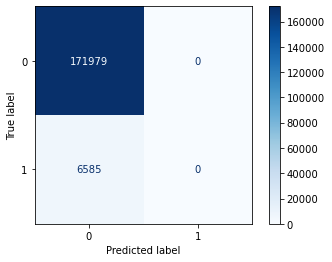

In [21]:
disp = plot_confusion_matrix(clf, X_valid, y_valid,
                             cmap=plt.cm.Blues,
                             normalize=None)

Well, it turns out that our model is completely useless. Let's calculate some basic statistics:

In [22]:
insurance_data.describe()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,0.185304,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,0.388544,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


As you see, there are less than 4% of positive examples, so we have to deal with a highly imbalanced dataset.

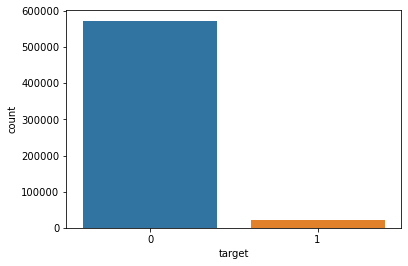

In [23]:
sns.countplot(x='target', data=insurance_data)
plt.show()

Accuracy is not informative here and the Normalized Gini Coefficient will be used instead: https://www.kaggle.com/c/porto-seguro-safe-driver-prediction/overview/evaluation.

In [24]:
# Code for calculating Normalized gini coefficient
# https://www.kaggle.com/c/ClaimPredictionChallenge/discussion/703
def gini(actual, pred, cmpcol = 0, sortcol = 1):  
    assert(len(actual) == len(pred))  
    epsilon = 1e-7
    values = np.asarray(np.c_[actual, pred, np.arange(len(actual))], dtype=np.float)  
    values = values[np.lexsort((values[:, 2], -1 * values[:, 1]))]  
    total = values[:, 0].sum() 
    gini_sum = (values[:, 0].cumsum().sum() + epsilon) / (total + epsilon)  
  
    gini_sum -= (len(actual) + 1) / 2  
    return gini_sum / len(actual)  
  
def gini_normalized(a, p):  
    '''Function to calculate the normalized gini coefficient'''
    return gini(a, p) / gini(a, a)

**(1.5 points)** Prove that the **Normalized Gini Coefficient** is equivalent to **2 x AUC - 1** :

< your proof >

**(0.5 points)** By the way, what other metrics could you suggest for this problem?

< your thoughts >

Let's calculate the Normalized Gini Coefficient:

In [25]:
y_pred = clf.predict_proba(X_valid)[:, 1]

In [26]:
gini_normalized(y_valid, y_pred)

0.2558723581569817

**(0.5 points + Y bonus points)** Try different approaches: oversampling / undersampling, careful feature analysis and feature engineering, etc., to get a reasonable pipeline and improve the model quality. Use cross-validation for model evaluation.

Select the best model, load the test set and make the predictions. Submit them to kaggle.
Y bonus points will be calculated as $\frac{round(200 * \max(score - 0.253, 0))}{2}$, where *score* is your kaggle leaderboard score.

Note: do not use any classification models which have not been covered in the lessons yet.

In [27]:
## your code